Chapter 10: Introduction to Artificial Networks and Keras

Chapter 10 exercises:

Info from Tensorflow playground:

For a more detailed introduction to neural networks, Michael Nielsen’s Neural Networks and Deep Learning (http://neuralnetworksanddeeplearning.com/index.html) is a good place to start. For a more technical overview, try Deep Learning (http://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

1. The Tensorflow playground (https://playground.tensorflow.org) is handy neural network simulator built by the Tensorflow team. In this exercise, you will train several binary classifiers in just a few clicks, and tweak the model's architecture and its hyperparameters to gain some intuition on how neural networks work and what their hyperparameters do. Take some to to explore the following:

1a. The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into  more complex patterns. In general, the more layers there are, the more complex the patterns can be.

1b. Activation functions. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

1c. The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.

1d. What happens when neural netws are too small. Remove one neuron to keep just two. Notice that the neural network is now incapabble of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.

1e. What happens when neural netwos are large enough. Set the number of neurons to eight and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an imnportant finding in neural network theory: large neural networks rarely get stuck in local minima, and even when they do these local optima are often almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

1f. The risk of vanishing gradient in deep networks. Select the spiral dataset (the bottom-right dataset under "DATA"), and change the network architecture to have four hidden layers with eight neurons each. Notice tha the training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layer (on the right) tend to evolve faster than the neurons in the lowest layer (on the left). this problem, called the 'vanishing gradients' problem, can be alleviated with better weights initialization and other techniques, better optimizers (such as AdaGrad or Adam), or batch normalization (discussed in Chapter 11).

1g. Go further. Take an hour or so to play around with other parameters, and get a feel for what they do, to build an inituitive understanding about neural networks.

2. Draw an ANN using the original artifiial neurons (like the one in Figure 10-3) that computes A ⊕ B (where ⊕ represents the exclusive OR). Hint:  A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

-> Since  A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B), you can implement two layer MLP with layer 1: 

> (A ∧ ¬ B): A x 1 + B x -1 = o1         $\;\;\;\;\;\;$        C = 0 if o1 < 0;   C = 1 if 01 >= 0  

> (¬ A ∧ B): A x -1 + B x 1 = 02         $\;\;\;\;\;\;$          D = 0 if o2 < 0;   D = 1 if 02 >= 0 

layer2:

> (C ∨ D):   C x 1 + D x 1 = E

https://humphryscomputing.com/Notes/Neural/single.neural.html:
A "single-layer" perceptron can't implement XOR. The reason is because the classes in XOR are not linearly separable. You cannot draw a straight line to separate the points (0,0),(1,1) from the points (0,1),(1,0). 

book answer:

Here is a neural network based on the original artificial neurons that computes _A_ ⊕ _B_ (where ⊕ represents the exclusive OR), using the fact that _A_ ⊕ _B_ = (_A_ ∧ ¬ _B_) ∨ (¬ _A_ ∧ _B_). There are other solutions—for example, using the fact that _A_ ⊕ _B_ = (_A_ ∨ _B_) ∧ ¬(_A_ ∧ _B_), or the fact that _A_ ⊕ _B_ = (_A_ ∨ _B_) ∧ (¬ _A_ ∨ ¬ _B_), and so on.<br /><img width="70%" src="https://github.com/ageron/handson-ml3/blob/main/images/ann/exercise2.png?raw=1" />

3. Why is it generally preferrable to use logistic regression classifier rather that a classic perceptron training algorithm (i.e. a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classifier?

-> classic perception (single layer) will only converge if the dataset is linearly separatable and it will be able estimate class probabilities
-> If you change the Perceptron's activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.

page 308: Perceptron vs Logistic regression classifers 
 - perceptron do not output a class probability while Logisitic regression does
 - perceptron do not use any regularization by default
 - stop training as soon as there are no more prediction errors on the training set, so the model typically does not generalize as well as logistic regression or a linear SVM classifier
 - perceptron may train a bit faster

page 307: perceptron convergence theorem:
 - the 'decision boundary' of each output neuron is linear, so the perceptron are incapable of learning complex patterns (just like logistic regression classifiers).
 - if the instances are 'linear separable', this algorithm would converge to a solution

page 315: Classification MLPs
 - MLPs can be used for classification
 - for binary classification, you need a single output neuron using a sigmoid activation function: the output will be between 0 and 1 which you can interpret as the estimated probability of the positive class and the negative class estimated probability is equal to 1 minus this number
 - for multilabel classification, you would dedicate one output neuron for each positive class using a sigmoid activation functions
 - for multiclass classification (each instance belongs to only one class), you need one neuron output neuron per class using the softmax activation function
 - the softmax function will ensure that all the estimated probabilities are between 0 and 1 and they will add up to 1
 - for loss function, since we are predicting probability distributions, the 'cross-entropy loss (or x-entryp or log loss) is generally a good choice
      
book answer: A classical Perceptron will converge only if the dataset is linearly separable, and it won't be able to estimate class probabilities. In contrast, a Logistic Regression classifier will generally converge to a reasonably good solution even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptron's activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.

4. Why was the sigmoid activation function a key ingredient in training the first MLPs?

-> allows using graident descent to be used for training because the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step.

page 312: In order for backprop t5o work properly, Runelhart .. made a key change to the MLPs architecture: they replaced the step function with the logistic function sigma(z) = 1 / (1 + exp(-z)), also called the sigmoid function. This was essential because the step function contains only flat segments, so there is no gradient to work (gradient descent cannot move on a flat surface), while the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the signmoid function. ...

book answer: The sigmoid activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.

5. Name three popular activation functions. Can you draw them?

-> activation functions:
$\;\;\;\;\;\;\;\;\;\;\;\;$ heavyside(z) =  $\;\;\;\;$ 0 if z < 0 ; $\;\;\;\;$ 1 if z >= 0 

The rectified linear unit function: $\;\;\;\;\;\;$ReLU(z) = max(0,z)

sigmoid function: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ sigma(z) = 1 / (1 + exp(-z))  

The hyperbolic tangent function: $\;\;\;\;\;\;$tanh(z) = 2 * sigma * (2z) - 1

book answer:
Popular activation functions include the step function, the sigmoid function, the hyperbolic tangent (tanh) function, and the Rectified Linear Unit (ReLU) function (see Figure 10-8). See Chapter 11 for other examples, such as ELU and variants of the ReLU function.



In [1]:
import numpy as np
import sklearn
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

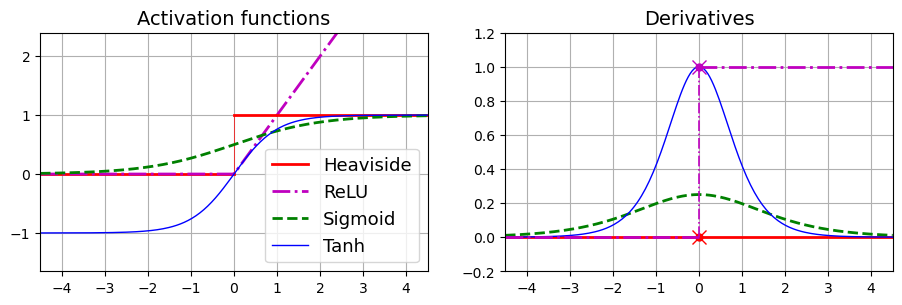

In [2]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

6. Suppose you have an MLP composed of one input layer with 10 passthrough neuron, followed by one hidden layer with 50 artifical neurons, and finally one output layer with 3 artifical neurons. All artifical neurons use the ReLU activation function.

6a. What is the shape of the input matrix __X__?

6b. What are the shapes of the hidden layer's weight matrix __$W_{h}$__, and bias vector __$b_{h}$__?

6c. What are the shapes of the output layer's weight matrix __$W_{o}$__, and bias vector __$b_{o}$__?

6d. What is the shape of the networks output matrix __Y__?

6e. Write the equation that compiles the networks's output matrix __Y__ as a function of __X__, __$W_{h}$__,  __$b_{h}$__, __$W_{o}$__, and __$b_{o}$__.

-> 6a. input maxtrix __X__ will m x 10 where m is the number instances in the training batch size

-> 6b. The shape of the hidden layer's weight matrix Wh is 10 × 50, and the length of its bias vector bh is 50.

-> 6c. The shape of the output layer's weight matrix **W**<sub>_o_</sub> is 50 × 3, and the length of its bias vector **b**<sub>_o_</sub> is 3.

-> 6d. The shape of the network's output matrix **Y** is _m_ × 3.

-> 6e.  **Y** = ReLU(ReLU(**X** **W**<sub>_h_</sub> + **b**<sub>_h_</sub>) **W**<sub>_o_</sub> + **b**<sub>_o_</sub>)


page 305:   Equation 10-2. Computing the outputs of a fully connected layer

$h_{W,b}(X) = \phi(XW + b)$

where:

X: matrix input features

W: weight matrix with one row per input, and one column per neuron

b: bias vector - contains all the bias terms, one per neuron

$\phi$: activation function': when the artificial neurons are TLUs, it is a step function

book answer:

 * The shape of the input matrix **X** is _m_ × 10, where _m_ represents the training batch size.
 * The shape of the hidden layer's weight matrix **W**<sub>_h_</sub> is 10 × 50, and the length of its bias vector **b**<sub>_h_</sub> is 50.
 * The shape of the output layer's weight matrix **W**<sub>_o_</sub> is 50 × 3, and the length of its bias vector **b**<sub>_o_</sub> is 3.
 * The shape of the network's output matrix **Y** is _m_ × 3.
 * **Y** = ReLU(ReLU(**X** **W**<sub>_h_</sub> + **b**<sub>_h_</sub>) **W**<sub>_o_</sub> + **b**<sub>_o_</sub>). Recall that the ReLU function just sets every negative number in the matrix to zero. Also note that when you are adding a bias vector to a matrix, it is added to every single row in the matrix, which is called _broadcasting_.
   


7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neuron do you need in the output layer, and which activation function should you use? What about for getting your nework to predict housing prices, an in chapter 2?

-> output layer neurons to binary classification email into spam or ham: 1

-> activation function for output layer: sigmoid since this is a binary classification where the output will be between 0 and 1 which you can interpret as the probability

-> for MINST, you need 10 neuron since there are 10 classes, and you should use softmax activation function since this is a multiclass classificaiton. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and they will add up to 1

-> housing prices is regression classification so you need one output neuron, using no activation function at all in the output layer. Note: when the values to predict can vary by many orders of magnitude, you may want to predict the logarithm of the target value rather than the target value directly. Simply computing the exponential of the neural network's output will give you the estimated value (since exp(log v) = v).

page 315: Classification MLPs
 - MLPs can be used for classification
 - for binary classification, you need a single output neuron using a sigmoid activation function: the output will be between 0 and 1 which you can interpret as the estimated probability of the positive class and the negative class estimated probability is equal to 1 minus this number
 - for multilabel classification, you would dedicate one output neuron for each positive class using a sigmoid activation functions
 - for multiclass classification (each instance belongs to only one class), you need one neuron output neuron per class using the softmax activation function
   - the softmax function will ensure that all the estimated probabilities are between 0 and 1 and they will add up to 1
 - for loss function, since we are predicting probability distributions, the 'cross-entropy loss (or x-entryp or log loss) is generally a good choice


page 313: Regression MLPs:
 - MLPs can be used for regression task
 - you a single neuron to predict a single value
 - for multivariate regressions (i.e. to predict multiple values at once), you need one neuron per output dimension (center of 2D image - needs to neurons to predict the 2D coordinate


page 315: Table 10-1. Typical Regression MLP Architecture

Hyperparameter                     $\;\;\;\;\;\;\;\;\;\;\;\;$Typical value

---------------                    $\;\;\;\;\;\;\;\;\;\;\;\;$-------------------------------

No of hidden layers                $\;\;\;\;\;\;\;\;\;\;\;\;$Depends on problem, but typically 1 to 5

No of neurons per hidden layer     $\;\;\;\;\;\;\;\;\;\;\;\;$Depends on problem, but typically 10 to 100

No of output neurons               $\;\;\;\;\;\;\;\;\;\;\;\;$1 per prediction dimension

hidden activation                  $\;\;\;\;\;\;\;\;\;\;\;\;$ReLU

output activation                  $\;\;\;\;\;\;\;\;\;\;\;\;$None, or ReLU/softmax (if positive outputs) or sigmoid/tanh (if bounded outputs)

Loss function                      $\;\;\;\;\;\;\;\;\;\;\;\;$MSE or Huber if outliers




book answer:

To classify email into spam or ham, you just need one neuron in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the sigmoid activation function in the output layer when estimating a probability. If instead you want to tackle MNIST, you need 10 neurons in the output layer, and you must replace the sigmoid function with the softmax activation function, which can handle multiple classes, outputting one probability per class. If you want your neural network to predict housing prices like in Chapter 2, then you need one output neuron, using no activation function at all in the output layer. Note: when the values to predict can vary by many orders of magnitude, you may want to predict the logarithm of the target value rather than the target value directly. Simply computing the exponential of the neural network's output will give you the estimated value (since exp(log _v_) = _v_).

8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-model autodiff?

-> how backpropagation works (based on page 311). It combines a forward pass to compute results for a mini-batch, measuring the output error using a loss function for the mini-batch, a reverse pass to measure the error gradient across all connection weights and biases by passing the error gradient backwards through the network, followed by a gradient descent step to tweak all connnection weights in network, using the error gradient it just computed.

-> backpropagation is this entire neural network process which includes using reverse-mode autodiff to calculate the gradients plus the gradient step, etc. Reverse-mode autodiff is forward pass and reverse pass technique to calculate the gradients. 

page 310: Then, in 1970, ... a technique to compute all the gradients automatically and efficiently. This algorithm is now called 'reverse-mode automatic differentiation' or ('reverse-mode autodiff' for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network's error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural networks's error. These gradients can then be used to perform gradient descent step. If you repeat this process of computing the gradients automatically and taking a gradient descent step, the neural network's error will gradually drop until it eventually treaches a minimum. This combinatioin of reverse-mode autodiff and gradient descent is now called 'backpropagation' (or 'backprop' for short).  

book answer:
Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn't called that when backpropagation was invented, and it has been reinvented several times). Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once (see Appendix B for more details). So what's the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.

9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

-> basic MLP hyperpanmeters you can tweak: number of hidden layer ('n_hidden'), number of neuron per hidden layer ('n_neurons'), activation function used in each hidden layer and output layer ('activation'), learning rate ('learning_rate'), 'optimizer', batch size ('batch_size')

-> how could you tweak these hyperparameters: hidden layers activation (page 352): the ReLU activation function is a good default for all hidden layer, output activation (table 10-2, page 316): Sigmoid for binary classification and softmax for multiclass classification; n_hidden (page 349 - 350): if overfitting, you can try reducing the number of hidden layers; n_neurons (page 350 - 351): if overfitting, you can try reducing the number of neurons per hidden layer 

page 351 - 352: ... The number of hidden layers and nuerons are not the only hyperparameters you can tweak in an MLP. Here are some of the most important ones, ...: learning rate, optimizer, batch size, activation function, number of iterations

book answer:  Here is a list of all the hyperparameters you can tweak in a basic MLP: the number of hidden layers, the number of neurons in each hidden layer, and the activation function used in each hidden layer and in the output layer. In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the sigmoid activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression. If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.

10. Train a deep MLP on the MNIST dataset (you can load it using tf.keras.dataset.mnist.load_data()). See if you can get 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e. by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the belss and whistles - save checkpoints, use early stopping, and plot the learning curves using Tensorboard.

Let's load the dataset:

In [3]:
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's imshow() function, with a 'binary' color map:

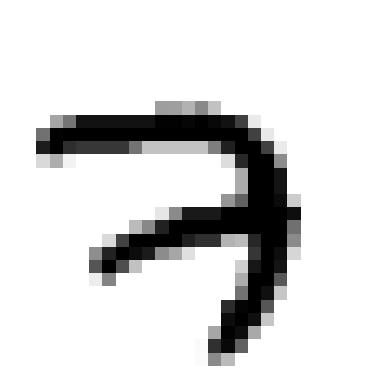

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a class_names array:

In [8]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [9]:
X_valid.shape

(5000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

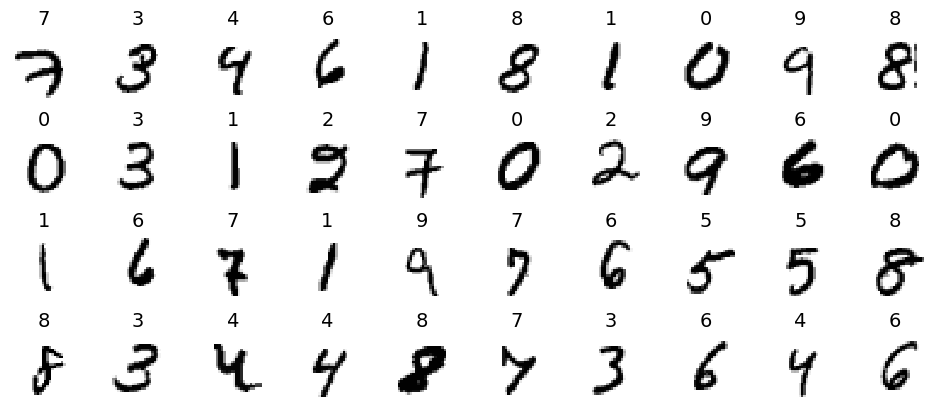

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

Create a custom callback for 'on_batch_end' (see paget 339 for custom callbacks)

In [12]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [13]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [15]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [16]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])



1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.5879 - val_loss: nan - val_accuracy: 0.0958


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

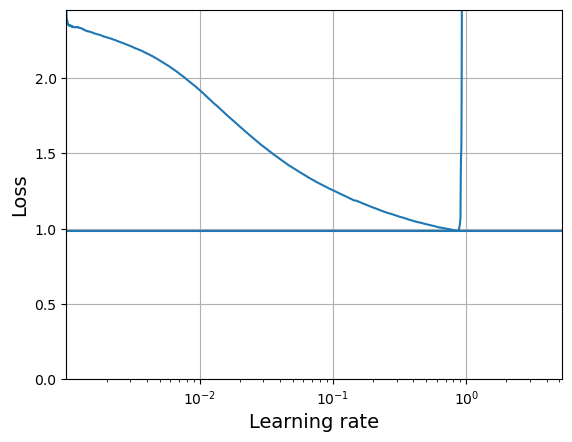

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [18]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [20]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [21]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [23]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - ETA: 0s - loss: 0.2335 - accuracy: 0.9268INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 7s 4ms/step - loss: 0.2335 - accuracy: 0.9268 - val_loss: 0.0978 - val_accuracy: 0.9710
Epoch 2/100
1703/1719 [============================>.] - ETA: 0s - loss: 0.0941 - accuracy: 0.9716INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 4ms/step - loss: 0.0941 - accuracy: 0.9715 - val_loss: 0.0917 - val_accuracy: 0.9746
Epoch 3/100
1709/1719 [============================>.] - ETA: 0s - loss: 0.0658 - accuracy: 0.9794INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 4ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0730 - val_accuracy: 0.9798
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0807 - val_accuracy: 0.9798
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0836 - val_accuracy: 0.9794
Epoch 6/100
1715/1719 [============================>.] - ETA: 0s - loss: 0.0273 - accuracy: 0.9913INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 4ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0722 - val_accuracy: 0.9794
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0789 - val_accuracy: 0.9828
Epoch 8/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0870 - val_accuracy: 0.9792
Epoch 9/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0835 - val_accuracy: 0.9816
Epoch 10/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0813 - val_accuracy: 0.9824
Epoch 11/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0928 - val_accuracy: 0.9830
Epoch 12/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.1047 - val_accuracy: 0

In [22]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_001')

In [24]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9791


[0.07583872973918915, 0.9790999889373779]

In [25]:
from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_mnist_logs (started 19:43:20 ago; pid 16632)
  - port 6006: logdir my_fashion_mnisthyperbandtensorboard (started 2 days, 21:00:02 ago; pid 19292)
  - port 6006: logdir ./my_logs (started 5 days, 18:22:13 ago; pid 3636)
  - port 6006: logdir ./my_fashion_mnist/hyperband/tensorboard (started 2 days, 19:34:22 ago; pid 3884)


In [26]:
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs

UsageError: Line magic function `%tensorboard` not found.


#### Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles - save checkpoints, use early stopping, and plot the learning curves using Tensorboard.

In [29]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [31]:
run_index = 2 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_002')

In [32]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_models", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)


random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_mnist_logs", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid), 
                           callbacks=[early_stopping_cb, tensorboard_cb])

Trial 5 Complete [00h 00m 50s]
val_accuracy: 0.8155999779701233

Best val_accuracy So Far: 0.9652000069618225
Total elapsed time: 00h 03m 55s


In [33]:
best_model = random_search_tuner.get_best_models()[0]

In [34]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.9652000069618225


In [35]:
best_trial.metrics.get_last_value("val_accuracy")

0.9652000069618225

In [49]:
# %load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs

In [50]:
from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_mnist_logs (started 0:15:07 ago; pid 14952)


In [51]:
!taskkill /IM "tensorboard.exe" /F
!rmdir /S /Q %temp%\.tensorboard-info

SUCCESS: The process "tensorboard.exe" with PID 1192 has been terminated.


In [52]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

best_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/100
1709/1719 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9648INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 7s 3ms/step - loss: 0.1460 - accuracy: 0.9648 - val_loss: 0.1522 - val_accuracy: 0.9664
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9703 - val_loss: 0.1826 - val_accuracy: 0.9592
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1397 - accuracy: 0.9666 - val_loss: 0.1796 - val_accuracy: 0.9606
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1367 - accuracy: 0.9676 - val_loss: 0.1693 - val_accuracy: 0.9658
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1255 - accuracy: 0.9699 - val_loss: 0.1618 - val_accuracy: 0.9652
Epoch 6/100
1718/1719 [============================>.] - ETA: 0s - loss: 0.1272 - accuracy: 0.9710INFO:tensorflow:Assets written to: my_mnist_model\assets


INFO:tensorflow:Assets written to: my_mnist_model\assets


1719/1719 [==============================] - 6s 3ms/step - loss: 0.1272 - accuracy: 0.9710 - val_loss: 0.1491 - val_accuracy: 0.9684
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1203 - accuracy: 0.9722 - val_loss: 0.2152 - val_accuracy: 0.9604
Epoch 8/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1195 - accuracy: 0.9731 - val_loss: 0.1822 - val_accuracy: 0.9660
Epoch 9/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1048 - accuracy: 0.9761 - val_loss: 0.2253 - val_accuracy: 0.9654
Epoch 10/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9750 - val_loss: 0.1658 - val_accuracy: 0.9644
Epoch 11/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1250 - accuracy: 0.9722 - val_loss: 0.1930 - val_accuracy: 0.9692
Epoch 12/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0969 - accuracy: 0.9788 - val_loss: 0.1923 - val_accuracy: 0